In [115]:
import numpy as np
from keras.datasets import mnist
from my_code_for_hw7copy import *   # copy my_code_for_hw7.py in the file directory
import matplotlib.pyplot as plt

In [116]:
# load the mnist dataset
path = '~/mit_6_036/w8_convolutional_neural_networks/mnist.npz'     # download mnist dataset and put it into the current directory
(X_train, y1), (X_val, y2) = mnist.load_data(path)

In [117]:
# pick just 0 and 1 data
mask = np.isin(y1, [0, 1])
X_train = X_train[mask]
y1 = y1[mask]
# make y1 as one-hot vectors\n",
y1 = for_softmax(y1)

In [118]:
# make the shape of input compatible for sgd
N, _, _ = X_train.shape
X_train_input = np.hstack(X_train.reshape(N, -1, 1))
X_train_input.shape

(784, 12665)

In [119]:
# do the same process on the validation set
mask = np.isin(y2, [0, 1])
X_val = X_val[mask]
y2 = y2[mask]
N, _, _ = X_val.shape
X_val_input = np.hstack(X_val.reshape(N, -1, 1))
X_val_input.shape

(784, 2115)

In [120]:
# define the NN object
# nn_core = Sequential([Linear(784, 32), ReLU(), Linear(32, 4), ReLU(), Linear(4,2), ReLU(), SoftMax()], NLL())
nn_core = Sequential([Linear(784, 32), ReLU(), Linear(32, 4), ReLU(), Linear(4,2), SoftMax()], NLL())

In [121]:
# train
nn_core.sgd(X_train_input, y1, iters=400, lrate=1e-3, batch_size=1, plot_loss=False)

In [122]:
# pick the last and the first linear modules to look them up
first_lin, last_lin = nn_core.modules[0], nn_core.modules[4]

In [123]:
# first let's look at their final weights
print('first_lin weights outgoing from the first input unit\n', first_lin.W[0, :])
print('first_lin biases\n', first_lin.W0.T)
print('last_lin weights\n', last_lin.W)
print('last_lin biases\n', last_lin.W0.T)

first_lin weights outgoing from the first input unit
 [-0.03710352 -0.01279151 -0.00066906  0.02848549  0.01117629  0.06312575
  0.08362644  0.02318115 -0.02614829  0.03898057 -0.00240342  0.06350502
 -0.04616841  0.03563568  0.02290778  0.00989785 -0.02200429  0.03904094
  0.03255775  0.03905041 -0.03484943  0.05172212  0.018802   -0.06008621
  0.04655549 -0.02495601 -0.0474606  -0.02605828  0.02936642 -0.03011968
  0.02039132  0.02753141]
first_lin biases
 [[-1.18228875e-04  1.83697783e-04 -5.91836395e-05 -1.40412100e-04
   1.50770881e-04  0.00000000e+00 -2.23919817e-04  4.68520822e-06
   1.18593717e-05 -1.39943919e-04  1.82585025e-10  1.46197753e-04
   9.43104201e-06 -1.18630220e-05  8.02980184e-06  2.17569345e-05
   0.00000000e+00  1.62292348e-05  5.33877705e-05 -8.43473297e-05
  -8.61047081e-05  9.75975321e-05  2.13603378e-05 -1.37030309e-04
  -9.74724274e-05  4.59289313e-05 -4.22888856e-05 -1.02958589e-05
  -1.34551386e-05  1.25525793e-15 -1.08352134e-04  0.00000000e+00]]
last_li

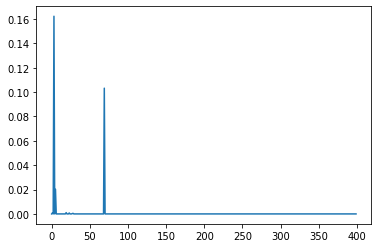

In [124]:
# plot weight changes magnitude
plt.plot(last_lin.delW)

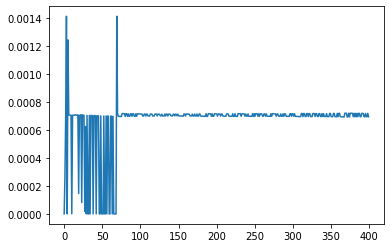

In [125]:
# plot bias changes magnitude
plt.plot(last_lin.delW0)

In [126]:
# look at the first and last changes in weights
print('first_lin\n')
print('first 10 changes in W (magnitude)\n', first_lin.delW[:10])
print('last 10 changes in W\n', first_lin.delW[-10:])
print('first 10 changes in W0 (magnitude)\n', first_lin.delW0[:10])
print('last 10 changes in W0\n', first_lin.delW0[-10:])

print('\nlast_lin\n')
print('first 10 changes in W (magnitude)\n', last_lin.delW[:10])
print('last 10 changes in W\n', last_lin.delW[-10:])
print('first 10 changes in W0 (magnitude)\n', last_lin.delW0[:10])
print('last 10 changes in W0\n', last_lin.delW0[-10:])

first_lin

first 10 changes in W (magnitude)
 [1.5396406259138808e-16, 0.10231468160369053, 0.0, 1.0757587850221069, 3.644742371718039e-05, 0.5773663108586639, 0.0, 0.0, 0.0, 0.0]
last 10 changes in W
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
first 10 changes in W0 (magnitude)
 [7.117466808859708e-20, 5.179599270502067e-05, 0.0, 0.0003621520410161033, 2.1588352081933266e-08, 0.0003174856007338887, 0.0, 0.0, 0.0, 0.0]
last 10 changes in W0
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

last_lin

first 10 changes in W (magnitude)
 [0.0, 0.0008627047104541709, 0.0, 0.16220302325996827, 5.483955188103073e-06, 0.020241294915275716, 0.0, 0.0, 0.0, 0.0]
last 10 changes in W
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
first 10 changes in W0 (magnitude)
 [1.936489335103478e-19, 0.0002656232205328815, 0.0007072395927952524, 0.001414213562373095, 1.1145499747079685e-07, 0.0012448436420660564, 0.000707412218586337, 0.0007071550498769798, 0.0007068014723710888, 0.00070644807

In [127]:
# look at the first and last Z's of the last layer, and also associated Y's, column-wise
loss = nn_core.loss
print('last_lin\n')
print('first Z\'s\n', np.hstack(last_lin.Zs[:4]))
print('first Y\'s\n', np.hstack(loss.Ys[:4]))
print('last Z\'s\n', np.hstack(last_lin.Zs[-4:]))
print('last Y\'s\n', np.hstack(loss.Ys[-4:]))

last_lin

first Z's
 [[-9.27463294e+01 -3.00189224e+00 -1.87823980e-04 -1.14540108e+02]
 [-5.63665804e+01 -1.53768040e+00  1.87823980e-04 -5.95961250e+01]]
first Y's
 [[0 0 1 1]
 [1 1 0 0]]
last Z's
 [[ 0.01615761  0.01664953  0.01714121  0.01663264]
 [-0.01615761 -0.01664953 -0.01714121 -0.01663264]]
last Y's
 [[1 1 0 1]
 [0 0 1 0]]


In [128]:
# look at the first and last dLdZ's of the last layer, column-wise
print('last_lin\n')
print('first dLdZ\'s\n', np.hstack(last_lin.dLdZs[:4]))
print('last dLdZ\'s\n', np.hstack(last_lin.dLdZs[-4:]))

last_lin

first dLdZ's
 [[ 1.58663032e-16  1.87823980e-01 -5.00093912e-01 -1.00000000e+00]
 [-1.11022302e-16 -1.87823980e-01  5.00093912e-01  1.00000000e+00]]
last dLdZ's
 [[-0.4919219  -0.491676    0.50856977 -0.49168445]
 [ 0.4919219   0.491676   -0.50856977  0.49168445]]


In [129]:
# test accuracy on validation dataset
# notice that the testing should be done after extracting stored values of the learning process from NN
# because by testing, we should forward validation dataset through NN and the stored values will be changed
Ypred_raw = nn_core.forward(X_val_input)
Ypred_tresh = np.argmax(Ypred_raw, axis=0)
np.mean(Ypred_tresh == y2)

0.46808510638297873


There is some interesting points to remark!

1. When we set the learning rate to 1e-3, which is a relatively high learning rate, in the first steps it might jump on the plateau of the border of loss surface, which the magnitude of gradient is almost zero there and slow down the learning process, such that it mimics the behavior of a local minimum.<br><br>
How have I found out that this is a plateau, not a local minimum?
<br><br>
Notice that learning algorithm here is mini-batch sgd, which probably allows to escape from local minima. But if the point is on a plateau, mini-batch can't do anything for it, because gradient of every possible mini-batches on the plateaus is almost zero, too. On the plateaus, sgd will move but dramatically slow.
<br><br>
Such problems also can occur around the saddle points and can be addressed [here](https://ganguli-gang.stanford.edu/pdf/14.SaddlePoint.NIPS.pdf).

2. In very high learning rates such that 1e-2 or bigger, another problem is overflow error encounters in the last module, SoftMax, when exponentiating big values of Z.
<br>
It occurs in the second forward, because the first backward made the parameters very big (and hence the unit values in the second forward can be big also) and the error make all the parameters to value np.nan.
